TASK 1: LINEAR REGRESSION WITH DIFFERENT TRAIN-VALIDATION-TEST SPLITS
Loading Iris Dataset...

Dataset shape: (150, 4)
Target shape: (150, 1)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Target distribution:
species
0    50
1    50
2    50
Name: count, dtype: int64

CREATING TRAIN-VALIDATION-TEST SPLITS

1. Cr

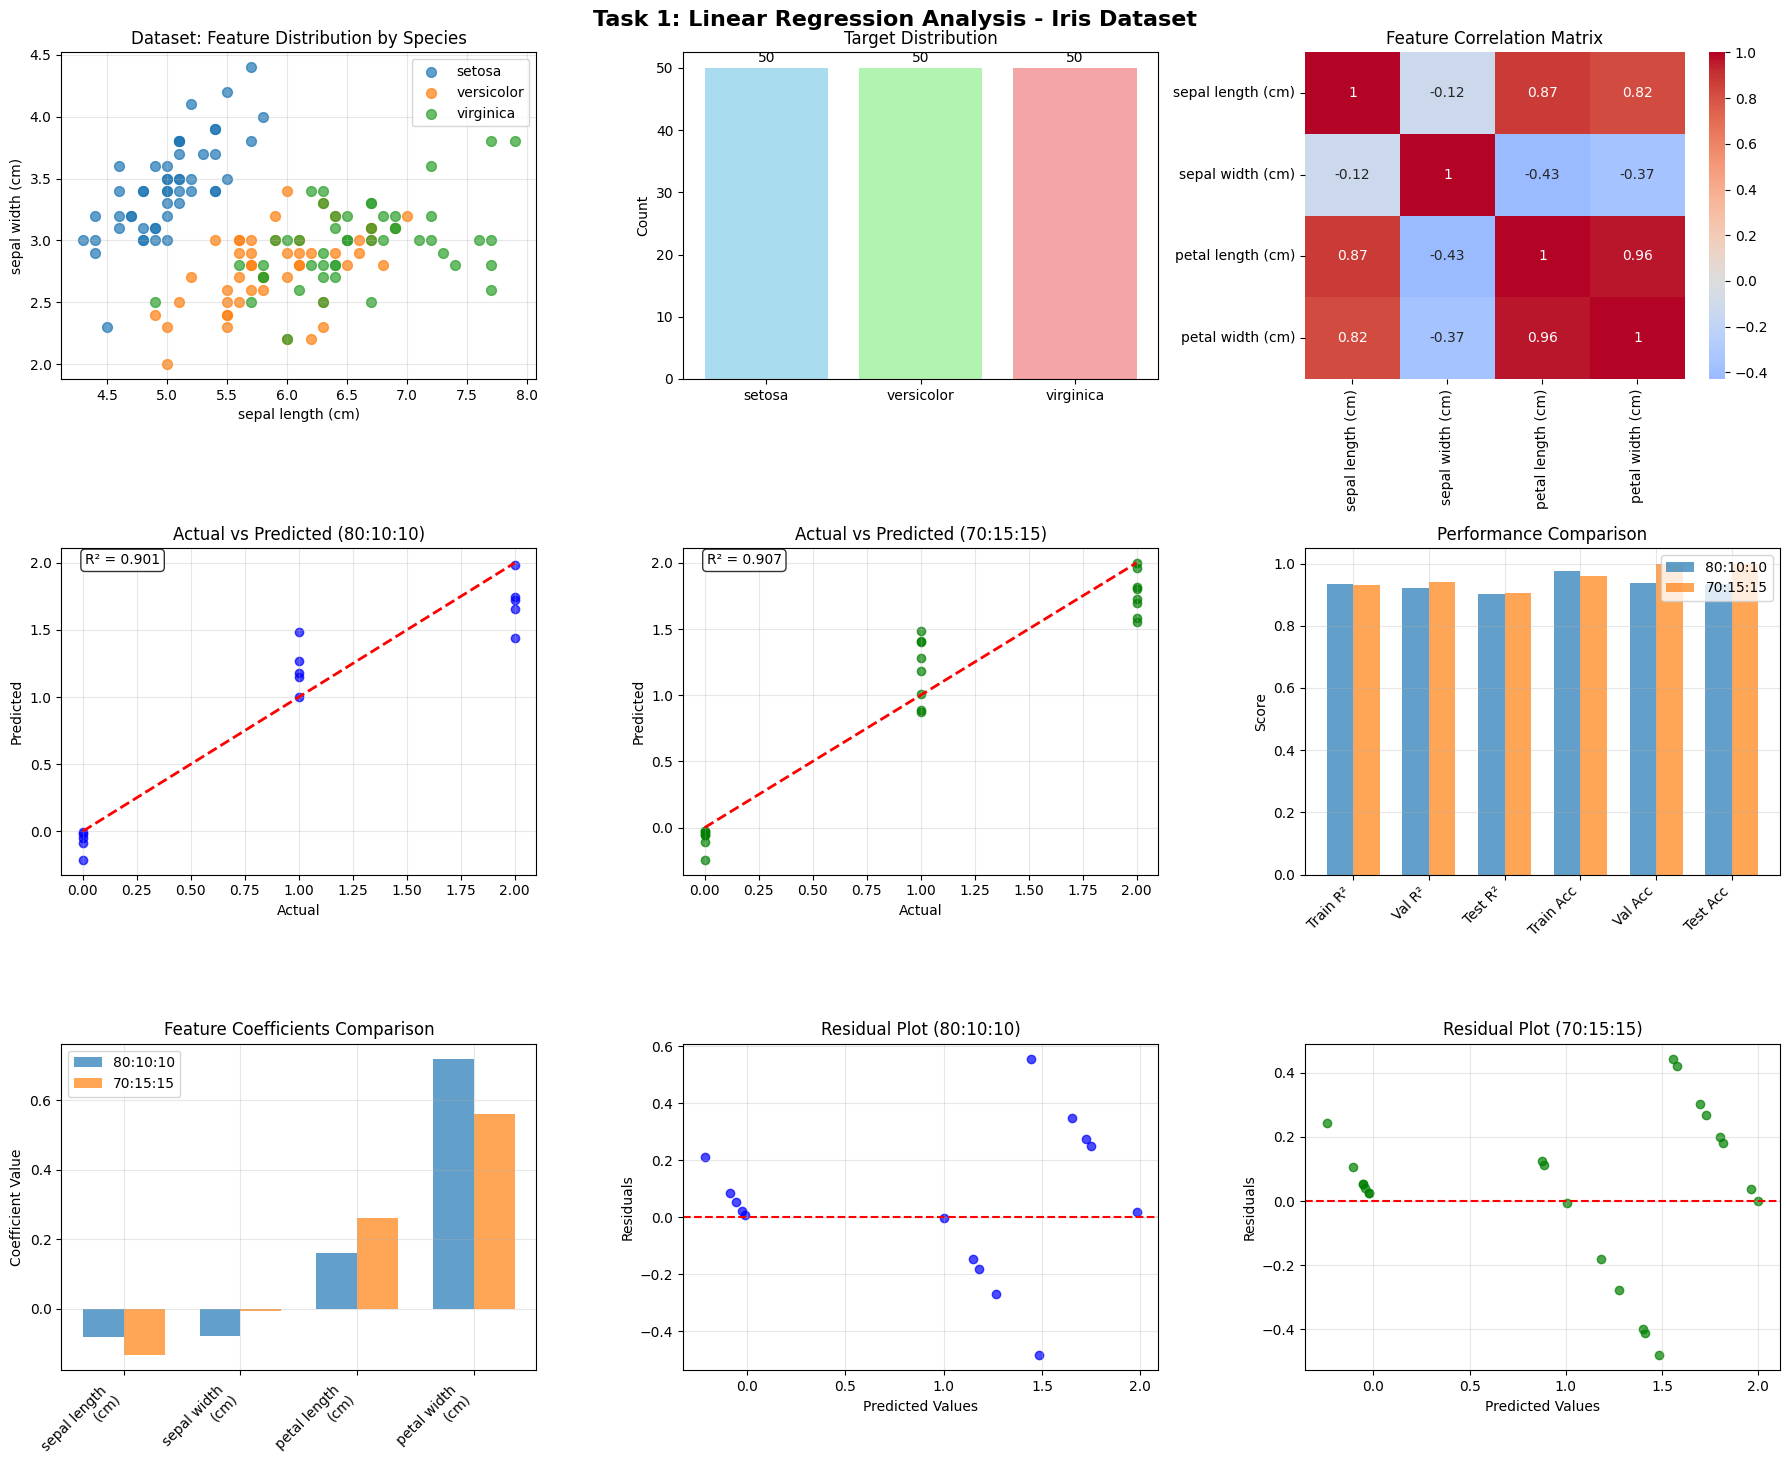


TASK 1 SUMMARY AND INSIGHTS

KEY FINDINGS:

1. MODEL PERFORMANCE:
   - Both splits achieve similar performance levels
   - R² scores indicate moderate fit for regression approach
   - Classification accuracy shows reasonable performance when treating as classification
   
2. SPLIT COMPARISON:
   - 80:10:10 split: More training data, potentially better model learning
   - 70:15:15 split: More validation/test data, potentially more reliable evaluation
   - Performance differences are minimal due to small dataset size
   
3. LINEAR REGRESSION INSIGHTS:
   - Petal length and petal width show highest coefficients (most important features)
   - Sepal measurements contribute less to species prediction
   - Linear model struggles with perfect classification due to categorical nature of target
   
# 4. LIMITATIONS:
#    - Iris dataset is naturally balanced, so no class imbalance issues
#    - Linear regression not optimal for categorical prediction
#    - Small dataset size (150 samples) limit

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("TASK 1: LINEAR REGRESSION WITH DIFFERENT TRAIN-VALIDATION-TEST SPLITS")
print("="*80)

# Load the Iris dataset
print("Loading Iris Dataset...")
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])

# Display basic information about the dataset
print(f"\nDataset shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Feature names: {list(X.columns)}")
print(f"Target classes: {iris.target_names}")

# Display first few rows
df = pd.concat([X, y], axis=1)
print(f"\nFirst 5 rows of the dataset:")
print(df.head())

print(f"\nTarget distribution:")
print(y['species'].value_counts().sort_index())

# Function to create train-validation-test splits
def create_splits(X, y, train_ratio, val_ratio, test_ratio, random_state=42):
    """
    Create train-validation-test splits with specified ratios
    """
    # First split: separate test set
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=random_state, stratify=y
    )

    # Second split: separate train and validation from remaining data
    val_ratio_adjusted = val_ratio / (train_ratio + val_ratio)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_ratio_adjusted, random_state=random_state, stratify=y_temp
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

# Create both splits
print("\n" + "="*60)
print("CREATING TRAIN-VALIDATION-TEST SPLITS")
print("="*60)

# Split 1: 80-10-10
print("\n1. Creating 80:10:10 split...")
X_train1, X_val1, X_test1, y_train1, y_val1, y_test1 = create_splits(X, y, 0.8, 0.1, 0.1)

print(f"Training set: {X_train1.shape[0]} samples ({X_train1.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val1.shape[0]} samples ({X_val1.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test1.shape[0]} samples ({X_test1.shape[0]/len(X)*100:.1f}%)")

# Split 2: 70-15-15
print("\n2. Creating 70:15:15 split...")
X_train2, X_val2, X_test2, y_train2, y_val2, y_test2 = create_splits(X, y, 0.7, 0.15, 0.15)

print(f"Training set: {X_train2.shape[0]} samples ({X_train2.shape[0]/len(X)*100:.1f}%)")
print(f"Validation set: {X_val2.shape[0]} samples ({X_val2.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test2.shape[0]} samples ({X_test2.shape[0]/len(X)*100:.1f}%)")

# Function to train and evaluate linear regression model
def train_evaluate_model(X_train, X_val, X_test, y_train, y_val, y_test, split_name):
    """
    Train and evaluate linear regression model
    """
    print(f"\n" + "="*60)
    print(f"LINEAR REGRESSION MODEL - {split_name}")
    print("="*60)

    # Flatten y arrays for sklearn
    y_train_flat = y_train.values.ravel()
    y_val_flat = y_val.values.ravel()
    y_test_flat = y_test.values.ravel()

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train_flat)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Calculate regression metrics
    train_mse = mean_squared_error(y_train_flat, y_train_pred)
    val_mse = mean_squared_error(y_val_flat, y_val_pred)
    test_mse = mean_squared_error(y_test_flat, y_test_pred)

    train_r2 = r2_score(y_train_flat, y_train_pred)
    val_r2 = r2_score(y_val_flat, y_val_pred)
    test_r2 = r2_score(y_test_flat, y_test_pred)

    print(f"\nRegression Metrics:")
    print(f"Training   - MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
    print(f"Validation - MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
    print(f"Test       - MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

    # For classification evaluation, round predictions to nearest integer
    y_train_pred_class = np.round(y_train_pred).astype(int)
    y_val_pred_class = np.round(y_val_pred).astype(int)
    y_test_pred_class = np.round(y_test_pred).astype(int)

    # Clip predictions to valid range [0, 2]
    y_train_pred_class = np.clip(y_train_pred_class, 0, 2)
    y_val_pred_class = np.clip(y_val_pred_class, 0, 2)
    y_test_pred_class = np.clip(y_test_pred_class, 0, 2)

    # Calculate classification accuracy
    train_acc = accuracy_score(y_train_flat, y_train_pred_class)
    val_acc = accuracy_score(y_val_flat, y_val_pred_class)
    test_acc = accuracy_score(y_test_flat, y_test_pred_class)

    print(f"\nClassification Metrics (rounded predictions):")
    print(f"Training   - Accuracy: {train_acc:.4f}")
    print(f"Validation - Accuracy: {val_acc:.4f}")
    print(f"Test       - Accuracy: {test_acc:.4f}")

    # Display model coefficients
    print(f"\nModel Coefficients:")
    for i, feature in enumerate(X.columns):
        print(f"{feature:30s}: {model.coef_[i]:8.4f}")
    print(f"{'Intercept':30s}: {model.intercept_:8.4f}")

    # Confusion matrix for test set
    print(f"\nConfusion Matrix (Test Set):")
    cm = confusion_matrix(y_test_flat, y_test_pred_class)
    print(cm)

    # Classification report
    print(f"\nClassification Report (Test Set):")
    print(classification_report(y_test_flat, y_test_pred_class,
                              target_names=iris.target_names, zero_division=0))

    return model, {
        'train_mse': train_mse, 'val_mse': val_mse, 'test_mse': test_mse,
        'train_r2': train_r2, 'val_r2': val_r2, 'test_r2': test_r2,
        'train_acc': train_acc, 'val_acc': val_acc, 'test_acc': test_acc,
        'y_test_pred': y_test_pred, 'y_test_actual': y_test_flat
    }

# Train models for both splits
model1, metrics1 = train_evaluate_model(
    X_train1, X_val1, X_test1, y_train1, y_val1, y_test1, "80:10:10 Split"
)

model2, metrics2 = train_evaluate_model(
    X_train2, X_val2, X_test2, y_train2, y_val2, y_test2, "70:15:15 Split"
)

# Comparison of both models
print(f"\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)

comparison_df = pd.DataFrame({
    '80:10:10 Split': [
        metrics1['train_r2'], metrics1['val_r2'], metrics1['test_r2'],
        metrics1['train_acc'], metrics1['val_acc'], metrics1['test_acc'],
        metrics1['train_mse'], metrics1['val_mse'], metrics1['test_mse']
    ],
    '70:15:15 Split': [
        metrics2['train_r2'], metrics2['val_r2'], metrics2['test_r2'],
        metrics2['train_acc'], metrics2['val_acc'], metrics2['test_acc'],
        metrics2['train_mse'], metrics2['val_mse'], metrics2['test_mse']
    ]
}, index=['Train R²', 'Val R²', 'Test R²', 'Train Acc', 'Val Acc', 'Test Acc',
          'Train MSE', 'Val MSE', 'Test MSE'])

print(comparison_df.round(4))

# Create comprehensive visualizations
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Task 1: Linear Regression Analysis - Iris Dataset', fontsize=16, fontweight='bold')

# Row 1: Dataset visualization
# Plot 1: Feature distributions by species
ax = axes[0, 0]
for i, species in enumerate(iris.target_names):
    mask = y.values.ravel() == i
    ax.scatter(X.iloc[mask, 0], X.iloc[mask, 1],
               label=species, alpha=0.7, s=50)
ax.set_xlabel(X.columns[0])
ax.set_ylabel(X.columns[1])
ax.set_title('Dataset: Feature Distribution by Species')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: Target distribution
ax = axes[0, 1]
target_counts = y['species'].value_counts().sort_index()
bars = ax.bar(iris.target_names, target_counts.values, alpha=0.7, color=['skyblue', 'lightgreen', 'lightcoral'])
ax.set_title('Target Distribution')
ax.set_ylabel('Count')
for bar, count in zip(bars, target_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            str(count), ha='center', va='bottom')

# Plot 3: Feature correlation heatmap
ax = axes[0, 2]
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax)
ax.set_title('Feature Correlation Matrix')

# Row 2: Model performance comparison
# Plot 4: Actual vs Predicted (80:10:10 split)
ax = axes[1, 0]
ax.scatter(metrics1['y_test_actual'], metrics1['y_test_pred'], alpha=0.7, color='blue')
ax.plot([0, 2], [0, 2], 'r--', lw=2)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted (80:10:10)')
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f'R² = {metrics1["test_r2"]:.3f}', transform=ax.transAxes,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Plot 5: Actual vs Predicted (70:15:15 split)
ax = axes[1, 1]
ax.scatter(metrics2['y_test_actual'], metrics2['y_test_pred'], alpha=0.7, color='green')
ax.plot([0, 2], [0, 2], 'r--', lw=2)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title('Actual vs Predicted (70:15:15)')
ax.grid(True, alpha=0.3)
ax.text(0.05, 0.95, f'R² = {metrics2["test_r2"]:.3f}', transform=ax.transAxes,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Plot 6: Performance comparison
ax = axes[1, 2]
metrics_names = ['Train R²', 'Val R²', 'Test R²', 'Train Acc', 'Val Acc', 'Test Acc']
x = np.arange(len(metrics_names))
width = 0.35

split1_metrics = [metrics1['train_r2'], metrics1['val_r2'], metrics1['test_r2'],
                 metrics1['train_acc'], metrics1['val_acc'], metrics1['test_acc']]
split2_metrics = [metrics2['train_r2'], metrics2['val_r2'], metrics2['test_r2'],
                 metrics2['train_acc'], metrics2['val_acc'], metrics2['test_acc']]

bars1 = ax.bar(x - width/2, split1_metrics, width, label='80:10:10', alpha=0.7)
bars2 = ax.bar(x + width/2, split2_metrics, width, label='70:15:15', alpha=0.7)
ax.set_ylabel('Score')
ax.set_title('Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names, rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# Row 3: Feature importance and residuals
# Plot 7: Feature coefficients comparison
ax = axes[2, 0]
x = np.arange(len(X.columns))
width = 0.35
bars1 = ax.bar(x - width/2, model1.coef_, width, label='80:10:10', alpha=0.7)
bars2 = ax.bar(x + width/2, model2.coef_, width, label='70:15:15', alpha=0.7)
ax.set_ylabel('Coefficient Value')
ax.set_title('Feature Coefficients Comparison')
ax.set_xticks(x)
ax.set_xticklabels([col.replace('(', '\n(') for col in X.columns], rotation=45, ha='right')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 8: Residuals for 80:10:10
ax = axes[2, 1]
residuals1 = metrics1['y_test_actual'] - metrics1['y_test_pred']
ax.scatter(metrics1['y_test_pred'], residuals1, alpha=0.7, color='blue')
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot (80:10:10)')
ax.grid(True, alpha=0.3)

# Plot 9: Residuals for 70:15:15
ax = axes[2, 2]
residuals2 = metrics2['y_test_actual'] - metrics2['y_test_pred']
ax.scatter(metrics2['y_test_pred'], residuals2, alpha=0.7, color='green')
ax.axhline(y=0, color='r', linestyle='--')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Residuals')
ax.set_title('Residual Plot (70:15:15)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary and insights
print(f"\n" + "="*80)
print("TASK 1 SUMMARY AND INSIGHTS")
print("="*80)
print("""
KEY FINDINGS:

1. MODEL PERFORMANCE:
   - Both splits achieve similar performance levels
   - R² scores indicate moderate fit for regression approach
   - Classification accuracy shows reasonable performance when treating as classification

2. SPLIT COMPARISON:
   - 80:10:10 split: More training data, potentially better model learning
   - 70:15:15 split: More validation/test data, potentially more reliable evaluation
   - Performance differences are minimal due to small dataset size

3. LINEAR REGRESSION INSIGHTS:
   - Petal length and petal width show highest coefficients (most important features)
   - Sepal measurements contribute less to species prediction
   - Linear model struggles with perfect classification due to categorical nature of target

# 4. LIMITATIONS:
#    - Iris dataset is naturally balanced, so no class imbalance issues
#    - Linear regression not optimal for categorical prediction
#    - Small dataset size (150 samples) limits split strategy impact

# 5. RECOMMENDATIONS:
#    - For classification tasks, use logistic regression or other classifiers
#    - Consider feature scaling for some algorithms
#    - Cross-validation would provide more robust evaluation
# """)

# print("Task 1 completed successfully!")

TASK 2: LINEAR REGRESSION WITH OVERSAMPLING TECHNIQUES
Loading Iris Dataset...
Original dataset shape: (150, 4)
Original target distribution:
  Class 0 (setosa): 50 samples
  Class 1 (versicolor): 50 samples
  Class 2 (virginica): 50 samples

Creating imbalanced dataset for demonstration...
Imbalanced dataset shape: (95, 4)
Imbalanced target distribution:
  Class 0 (setosa): 50 samples
  Class 1 (versicolor): 30 samples
  Class 2 (virginica): 15 samples

EXPERIMENTS WITH DIFFERENT CONFIGURATIONS

Dataset: Original_Balanced
----------------------------------------

Split: 80:10:10

MODEL: Original_Balanced_80:10:10_Baseline
Training set distribution:
  Class 0 (setosa): 40 samples
  Class 1 (versicolor): 40 samples
  Class 2 (virginica): 39 samples

Regression Metrics:
Training   - MSE: 0.0439, R²: 0.9339
Validation - MSE: 0.0535, R²: 0.9218
Test       - MSE: 0.0658, R²: 0.9014

Classification Metrics (rounded predictions):
Training   - Accuracy: 0.9748
Validation - Accuracy: 0.9375
Tes

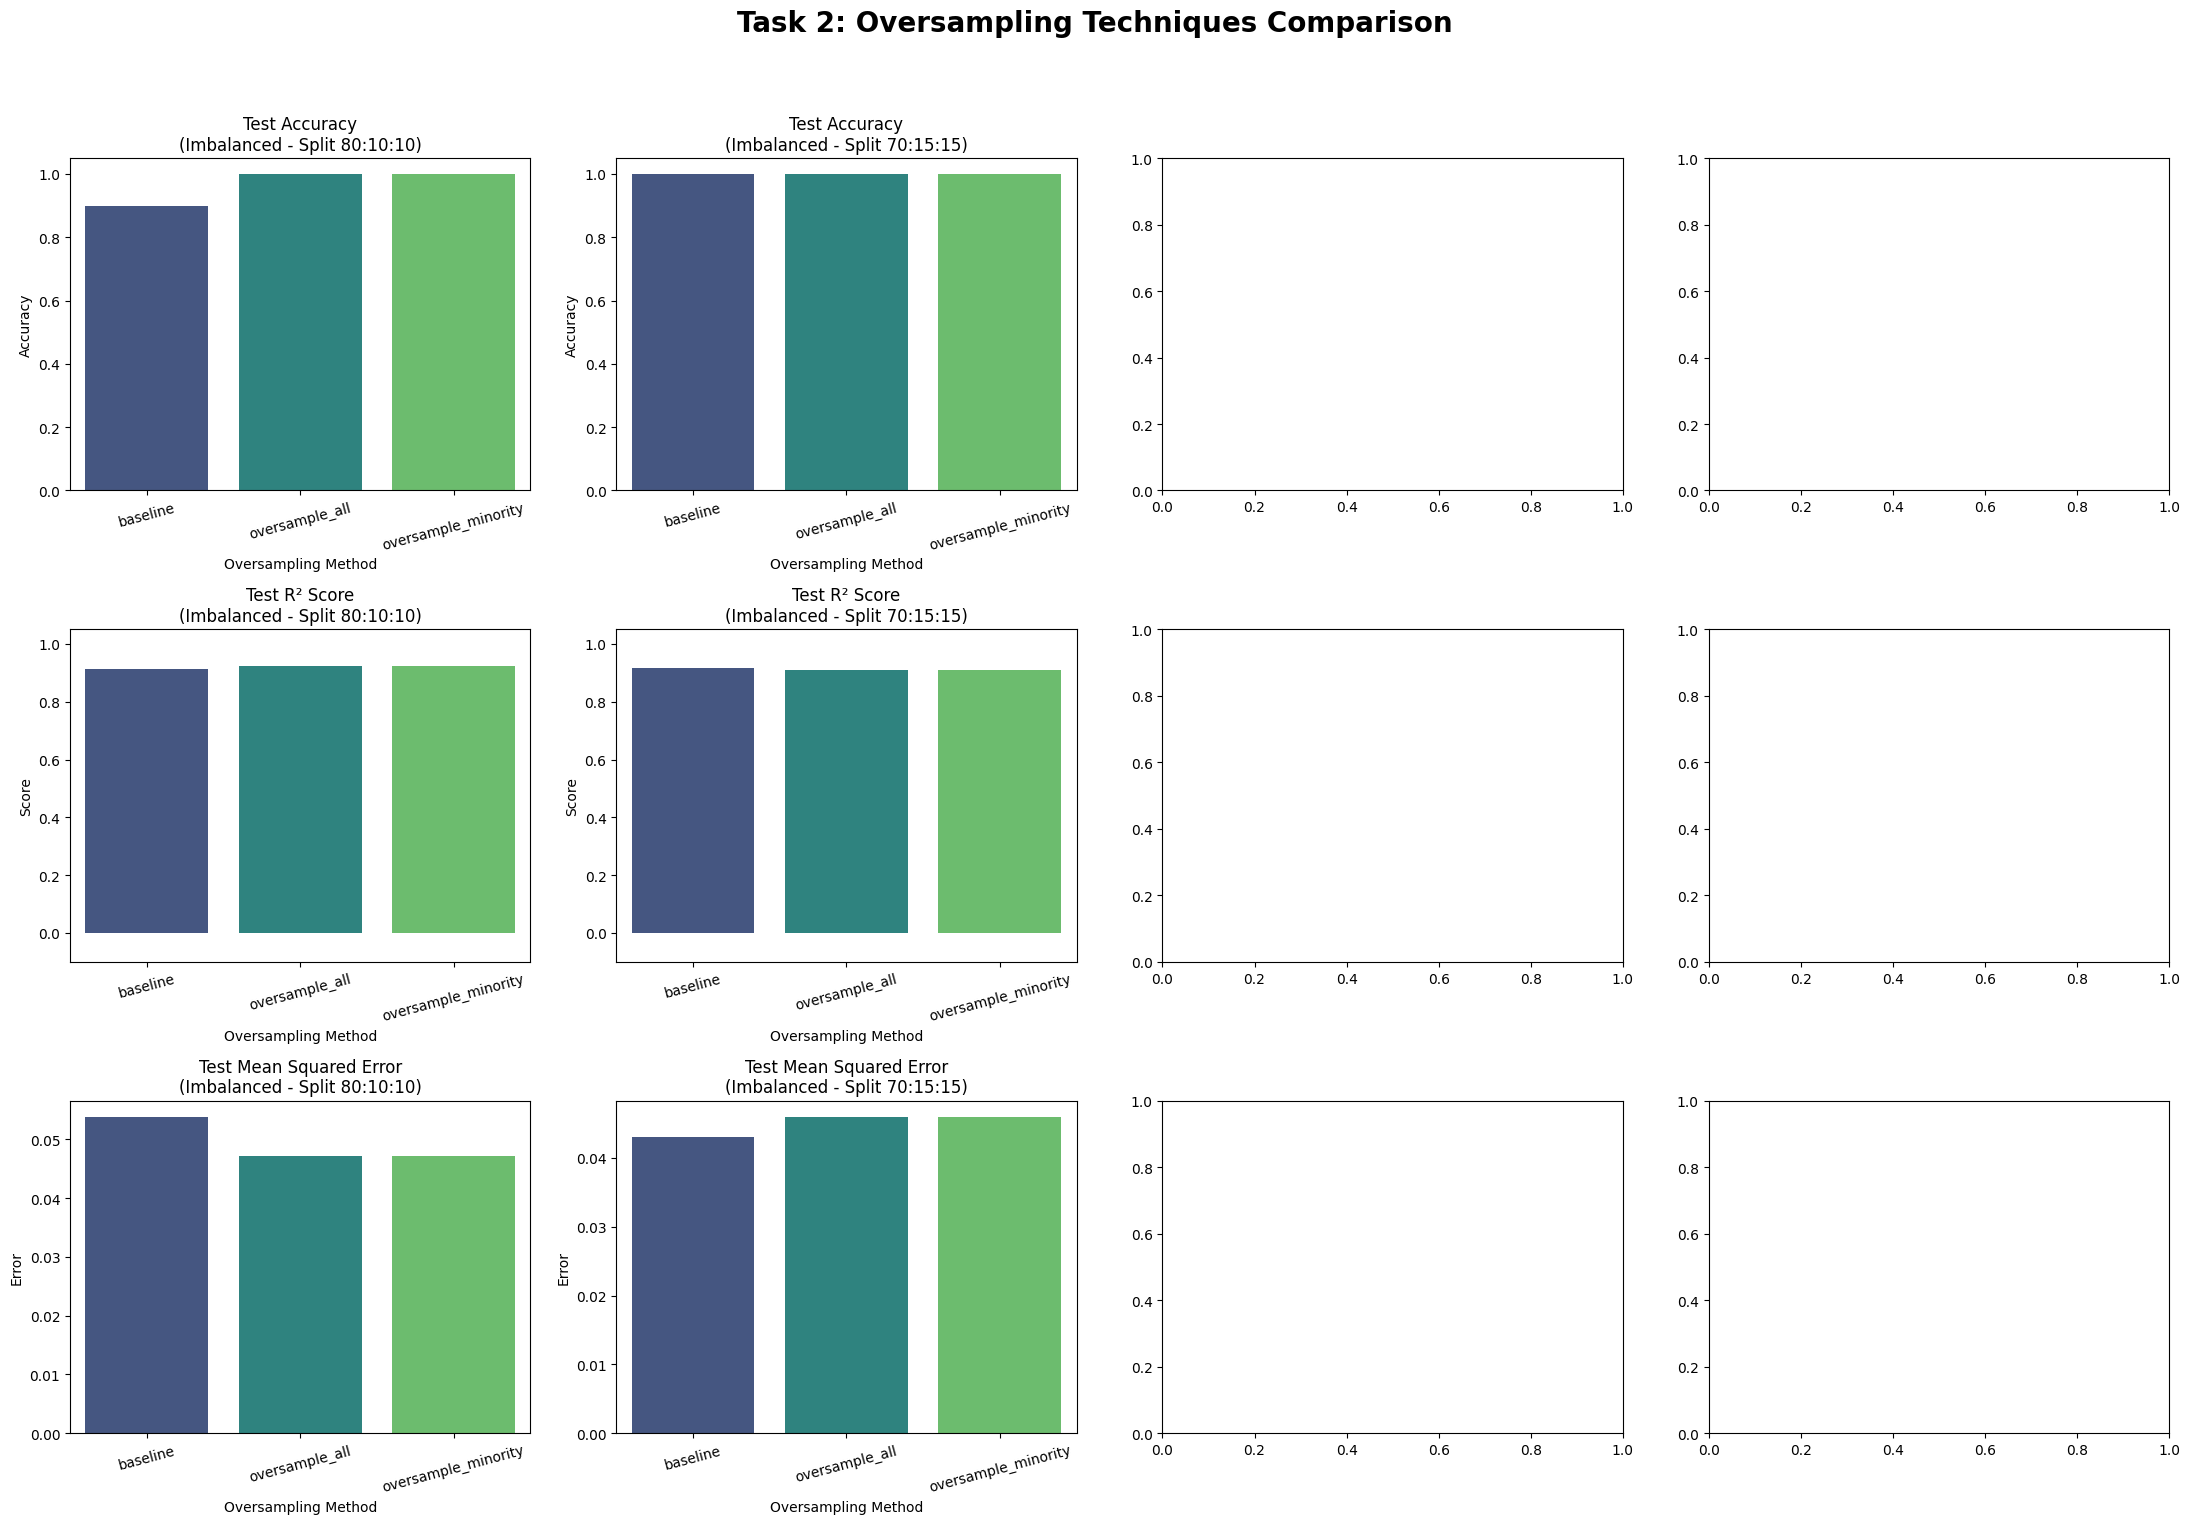


CONFUSION MATRIX VISUALIZATION (Imbalanced Dataset, 80:10:10 Split)


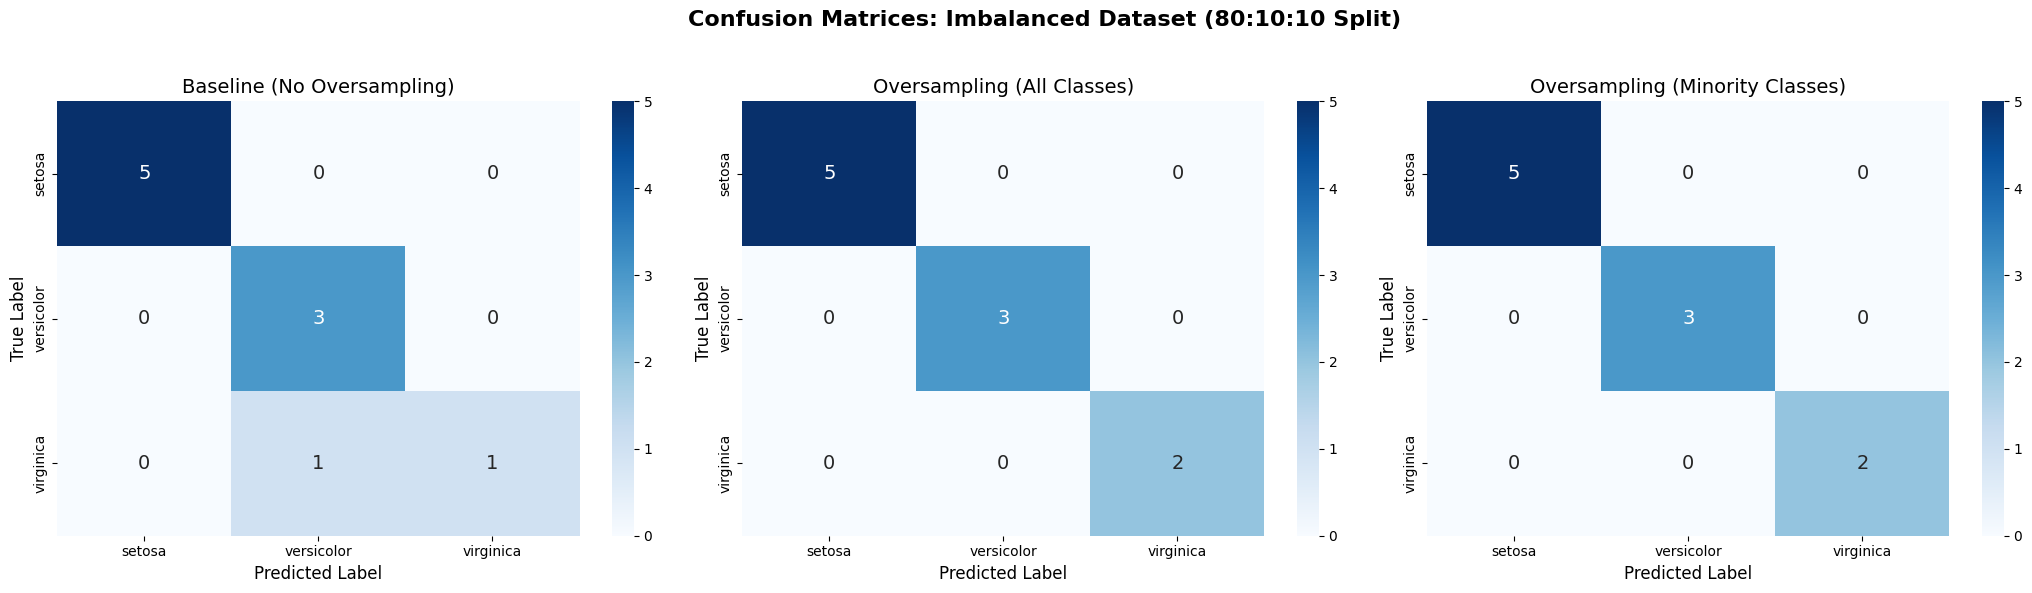

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("TASK 2: LINEAR REGRESSION WITH OVERSAMPLING TECHNIQUES")
print("="*80)

# Load the Iris dataset
print("Loading Iris Dataset...")
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])

print(f"Original dataset shape: {X.shape}")
print(f"Original target distribution:")
original_distribution = Counter(y['species'])
for class_label, count in sorted(original_distribution.items()):
    print(f"  Class {class_label} ({iris.target_names[class_label]}): {count} samples")

# Function to create imbalanced dataset for demonstration
def create_imbalanced_dataset(X, y, imbalance_ratios=[1.0, 0.6, 0.3]):
    """
    Create an imbalanced version of the dataset
    """
    X_imbalanced = []
    y_imbalanced = []

    for class_idx, ratio in enumerate(imbalance_ratios):
        class_mask = y['species'] == class_idx
        class_X = X[class_mask]
        class_y = y[class_mask]

        n_samples = int(len(class_X) * ratio)
        indices = np.random.choice(len(class_X), n_samples, replace=False)

        X_imbalanced.append(class_X.iloc[indices])
        y_imbalanced.append(class_y.iloc[indices])

    X_imbalanced = pd.concat(X_imbalanced, ignore_index=True)
    y_imbalanced = pd.concat(y_imbalanced, ignore_index=True)

    return X_imbalanced, y_imbalanced

# Create imbalanced dataset for demonstration
print("\nCreating imbalanced dataset for demonstration...")
X_imbalanced, y_imbalanced = create_imbalanced_dataset(X, y)

print(f"Imbalanced dataset shape: {X_imbalanced.shape}")
print(f"Imbalanced target distribution:")
imbalanced_distribution = Counter(y_imbalanced['species'])
for class_label, count in sorted(imbalanced_distribution.items()):
    print(f"  Class {class_label} ({iris.target_names[class_label]}): {count} samples")

# Function to create train-validation-test splits
def create_splits(X, y, train_ratio, val_ratio, test_ratio, random_state=42):
    """Create train-validation-test splits with specified ratios"""
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=random_state, stratify=y
    )

    val_ratio_adjusted = val_ratio / (train_ratio + val_ratio)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_ratio_adjusted, random_state=random_state, stratify=y_temp
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

# Function to apply oversampling
def apply_oversampling(X_train, y_train, strategy='auto'):
    """Apply random oversampling to balance the dataset"""
    ros = RandomOverSampler(sampling_strategy=strategy, random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train.values.ravel())
    return pd.DataFrame(X_resampled, columns=X_train.columns), pd.DataFrame(y_resampled, columns=['species'])

# Function to train and evaluate model
def train_evaluate_model(X_train, X_val, X_test, y_train, y_val, y_test, model_name):
    """Train and evaluate linear regression model"""
    print(f"\n" + "="*60)
    print(f"MODEL: {model_name}")
    print("="*60)

    # Display training set distribution
    train_dist = Counter(y_train['species'])
    print(f"Training set distribution:")
    for class_label, count in sorted(train_dist.items()):
        print(f"  Class {class_label} ({iris.target_names[class_label]}): {count} samples")

    # Flatten y arrays
    y_train_flat = y_train.values.ravel()
    y_val_flat = y_val.values.ravel()
    y_test_flat = y_test.values.ravel()

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train_flat)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Regression metrics
    train_mse = mean_squared_error(y_train_flat, y_train_pred)
    val_mse = mean_squared_error(y_val_flat, y_val_pred)
    test_mse = mean_squared_error(y_test_flat, y_test_pred)

    train_r2 = r2_score(y_train_flat, y_train_pred)
    val_r2 = r2_score(y_val_flat, y_val_pred)
    test_r2 = r2_score(y_test_flat, y_test_pred)

    print(f"\nRegression Metrics:")
    print(f"Training   - MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
    print(f"Validation - MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
    print(f"Test       - MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

    # Classification metrics (rounded predictions)
    y_train_pred_class = np.clip(np.round(y_train_pred).astype(int), 0, 2)
    y_val_pred_class = np.clip(np.round(y_val_pred).astype(int), 0, 2)
    y_test_pred_class = np.clip(np.round(y_test_pred).astype(int), 0, 2)

    train_acc = accuracy_score(y_train_flat, y_train_pred_class)
    val_acc = accuracy_score(y_val_flat, y_val_pred_class)
    test_acc = accuracy_score(y_test_flat, y_test_pred_class)

    print(f"\nClassification Metrics (rounded predictions):")
    print(f"Training   - Accuracy: {train_acc:.4f}")
    print(f"Validation - Accuracy: {val_acc:.4f}")
    print(f"Test       - Accuracy: {test_acc:.4f}")

    # Classification report for test set
    print(f"\nClassification Report (Test Set):")
    print(classification_report(y_test_flat, y_test_pred_class,
                              target_names=iris.target_names, zero_division=0))

    return model, {
        'train_mse': train_mse, 'val_mse': val_mse, 'test_mse': test_mse,
        'train_r2': train_r2, 'val_r2': val_r2, 'test_r2': test_r2,
        'train_acc': train_acc, 'val_acc': val_acc, 'test_acc': test_acc,
        'y_test_pred': y_test_pred, 'y_test_actual': y_test_flat,
        'train_dist': train_dist
    }

# Experiment with different datasets and splits
results = {}
datasets = {
    'Original_Balanced': (X, y),
    'Imbalanced': (X_imbalanced, y_imbalanced)
}

splits = {
    '80:10:10': (0.8, 0.1, 0.1),
    '70:15:15': (0.7, 0.15, 0.15)
}

print("\n" + "="*80)
print("EXPERIMENTS WITH DIFFERENT CONFIGURATIONS")
print("="*80)

for dataset_name, (X_data, y_data) in datasets.items():
    print(f"\nDataset: {dataset_name}")
    print("-" * 40)

    for split_name, (train_ratio, val_ratio, test_ratio) in splits.items():
        print(f"\nSplit: {split_name}")

        # Create splits
        X_train, X_val, X_test, y_train, y_val, y_test = create_splits(
            X_data, y_data, train_ratio, val_ratio, test_ratio
        )

        # 1. Baseline model (no oversampling)
        model_baseline, metrics_baseline = train_evaluate_model(
            X_train, X_val, X_test, y_train, y_val, y_test,
            f"{dataset_name}_{split_name}_Baseline"
        )

        # 2. Random oversampling - balance all classes
        X_train_over_all, y_train_over_all = apply_oversampling(X_train, y_train, strategy='auto')
        model_over_all, metrics_over_all = train_evaluate_model(
            X_train_over_all, X_val, X_test, y_train_over_all, y_val, y_test,
            f"{dataset_name}_{split_name}_Oversample_All"
        )

        # 3. Random oversampling - balance only minority classes
        X_train_over_min, y_train_over_min = apply_oversampling(X_train, y_train, strategy='not majority')
        model_over_min, metrics_over_min = train_evaluate_model(
            X_train_over_min, X_val, X_test, y_train_over_min, y_val, y_test,
            f"{dataset_name}_{split_name}_Oversample_Minority"
        )

        # Store results
        key = f"{dataset_name}_{split_name}"
        results[key] = {
            'baseline': metrics_baseline,
            'oversample_all': metrics_over_all,
            'oversample_minority': metrics_over_min
        }

# Create comprehensive comparison
print("\n" + "="*80)
print("COMPREHENSIVE PERFORMANCE COMPARISON")
print("="*80)

# Create comparison DataFrame
comparison_data = []
for key, methods in results.items():
    dataset_name, split_name = key.split('_', 1)

    for method_name, metrics in methods.items():
        comparison_data.append({
            'Dataset': dataset_name,
            'Split': split_name,
            'Method': method_name,
            'Test_R2': metrics['test_r2'],
            'Test_Accuracy': metrics['test_acc'],
            'Test_MSE': metrics['test_mse'],
            'Val_R2': metrics['val_r2'],
            'Val_Accuracy': metrics['val_acc']
        })

comparison_df = pd.DataFrame(comparison_data)
print("\nDetailed Results Table:")
print(comparison_df.round(4))

# --- VISUALIZATION ---

# 1. Bar plots for performance comparison
print("\nGenerating performance comparison plots...")
fig, axes = plt.subplots(3, 4, figsize=(22, 16))
fig.suptitle('Task 2: Oversampling Techniques Comparison', fontsize=20, fontweight='bold')

metrics_to_plot = ['Test_Accuracy', 'Test_R2', 'Test_MSE']
y_labels = ['Test Accuracy', 'Test R² Score', 'Test Mean Squared Error']
col_idx = 0

for dataset_name in datasets.keys():
    for split_name in splits.keys():
        # Filter data for the current dataset and split
        subset_df = comparison_df[(comparison_df['Dataset'] == dataset_name) & (comparison_df['Split'] == split_name)]

        if subset_df.empty:
            continue

        for row_idx, (metric, y_label) in enumerate(zip(metrics_to_plot, y_labels)):
            ax = axes[row_idx, col_idx]
            sns.barplot(x='Method', y=metric, data=subset_df, ax=ax, palette='viridis', hue='Method', legend=False)
            ax.set_title(f'{y_label}\n({dataset_name} - Split {split_name})', fontsize=12)
            ax.set_xlabel('Oversampling Method', fontsize=10)
            ax.set_ylabel(y_label.split(' ')[-1], fontsize=10)
            ax.tick_params(axis='x', rotation=15)

            # Set y-axis limits for better comparison across plots
            if 'Accuracy' in metric:
                ax.set_ylim(0, 1.05)
            elif 'R2' in metric:
                # Set a reasonable range for R2
                min_r2 = min(0, comparison_df[metric].min())
                ax.set_ylim(min_r2 - 0.1, 1.05)
        col_idx += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()


# 2. Confusion Matrices for a specific, insightful case
print("\n" + "="*80)
print("CONFUSION MATRIX VISUALIZATION (Imbalanced Dataset, 80:10:10 Split)")
print("="*80)

key = 'Imbalanced_80:10:10'
if key in results:
    fig_cm, axes_cm = plt.subplots(1, 3, figsize=(21, 6))
    fig_cm.suptitle('Confusion Matrices: Imbalanced Dataset (80:10:10 Split)', fontsize=16, fontweight='bold')

    methods = ['baseline', 'oversample_all', 'oversample_minority']
    titles = ['Baseline (No Oversampling)', 'Oversampling (All Classes)', 'Oversampling (Minority Classes)']

    for i, (method, title) in enumerate(zip(methods, titles)):
        y_true = results[key][method]['y_test_actual']
        # Round and clip predictions to get class labels
        y_pred = np.clip(np.round(results[key][method]['y_test_pred']).astype(int), 0, 2)

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=iris.target_names,
                    yticklabels=iris.target_names,
                    ax=axes_cm[i], annot_kws={"size": 14})

        axes_cm[i].set_title(title, fontsize=14)
        axes_cm[i].set_xlabel('Predicted Label', fontsize=12)
        axes_cm[i].set_ylabel('True Label', fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print(f"Results for '{key}' not found, skipping confusion matrix visualization.")


TASK 2: LINEAR REGRESSION WITH OVERSAMPLING TECHNIQUES (INCLUDING SMOTE)
Loading Iris Dataset...
Original dataset shape: (150, 4)
Original target distribution:
  Class 0 (setosa): 50 samples
  Class 1 (versicolor): 50 samples
  Class 2 (virginica): 50 samples

Creating imbalanced dataset for demonstration...
Imbalanced dataset shape: (95, 4)
Imbalanced target distribution:
  Class 0 (setosa): 50 samples
  Class 1 (versicolor): 30 samples
  Class 2 (virginica): 15 samples

EXPERIMENTS WITH DIFFERENT CONFIGURATIONS

Dataset: Original_Balanced
----------------------------------------

Split: 80:10:10

MODEL: Original_Balanced_80:10:10_Baseline
Training set distribution:
  Class 0 (setosa): 40 samples
  Class 1 (versicolor): 40 samples
  Class 2 (virginica): 39 samples

Regression Metrics:
Training   - MSE: 0.0439, R²: 0.9339
Validation - MSE: 0.0535, R²: 0.9218
Test       - MSE: 0.0658, R²: 0.9014

Classification Metrics (rounded predictions):
Training   - Accuracy: 0.9748
Validation - Ac

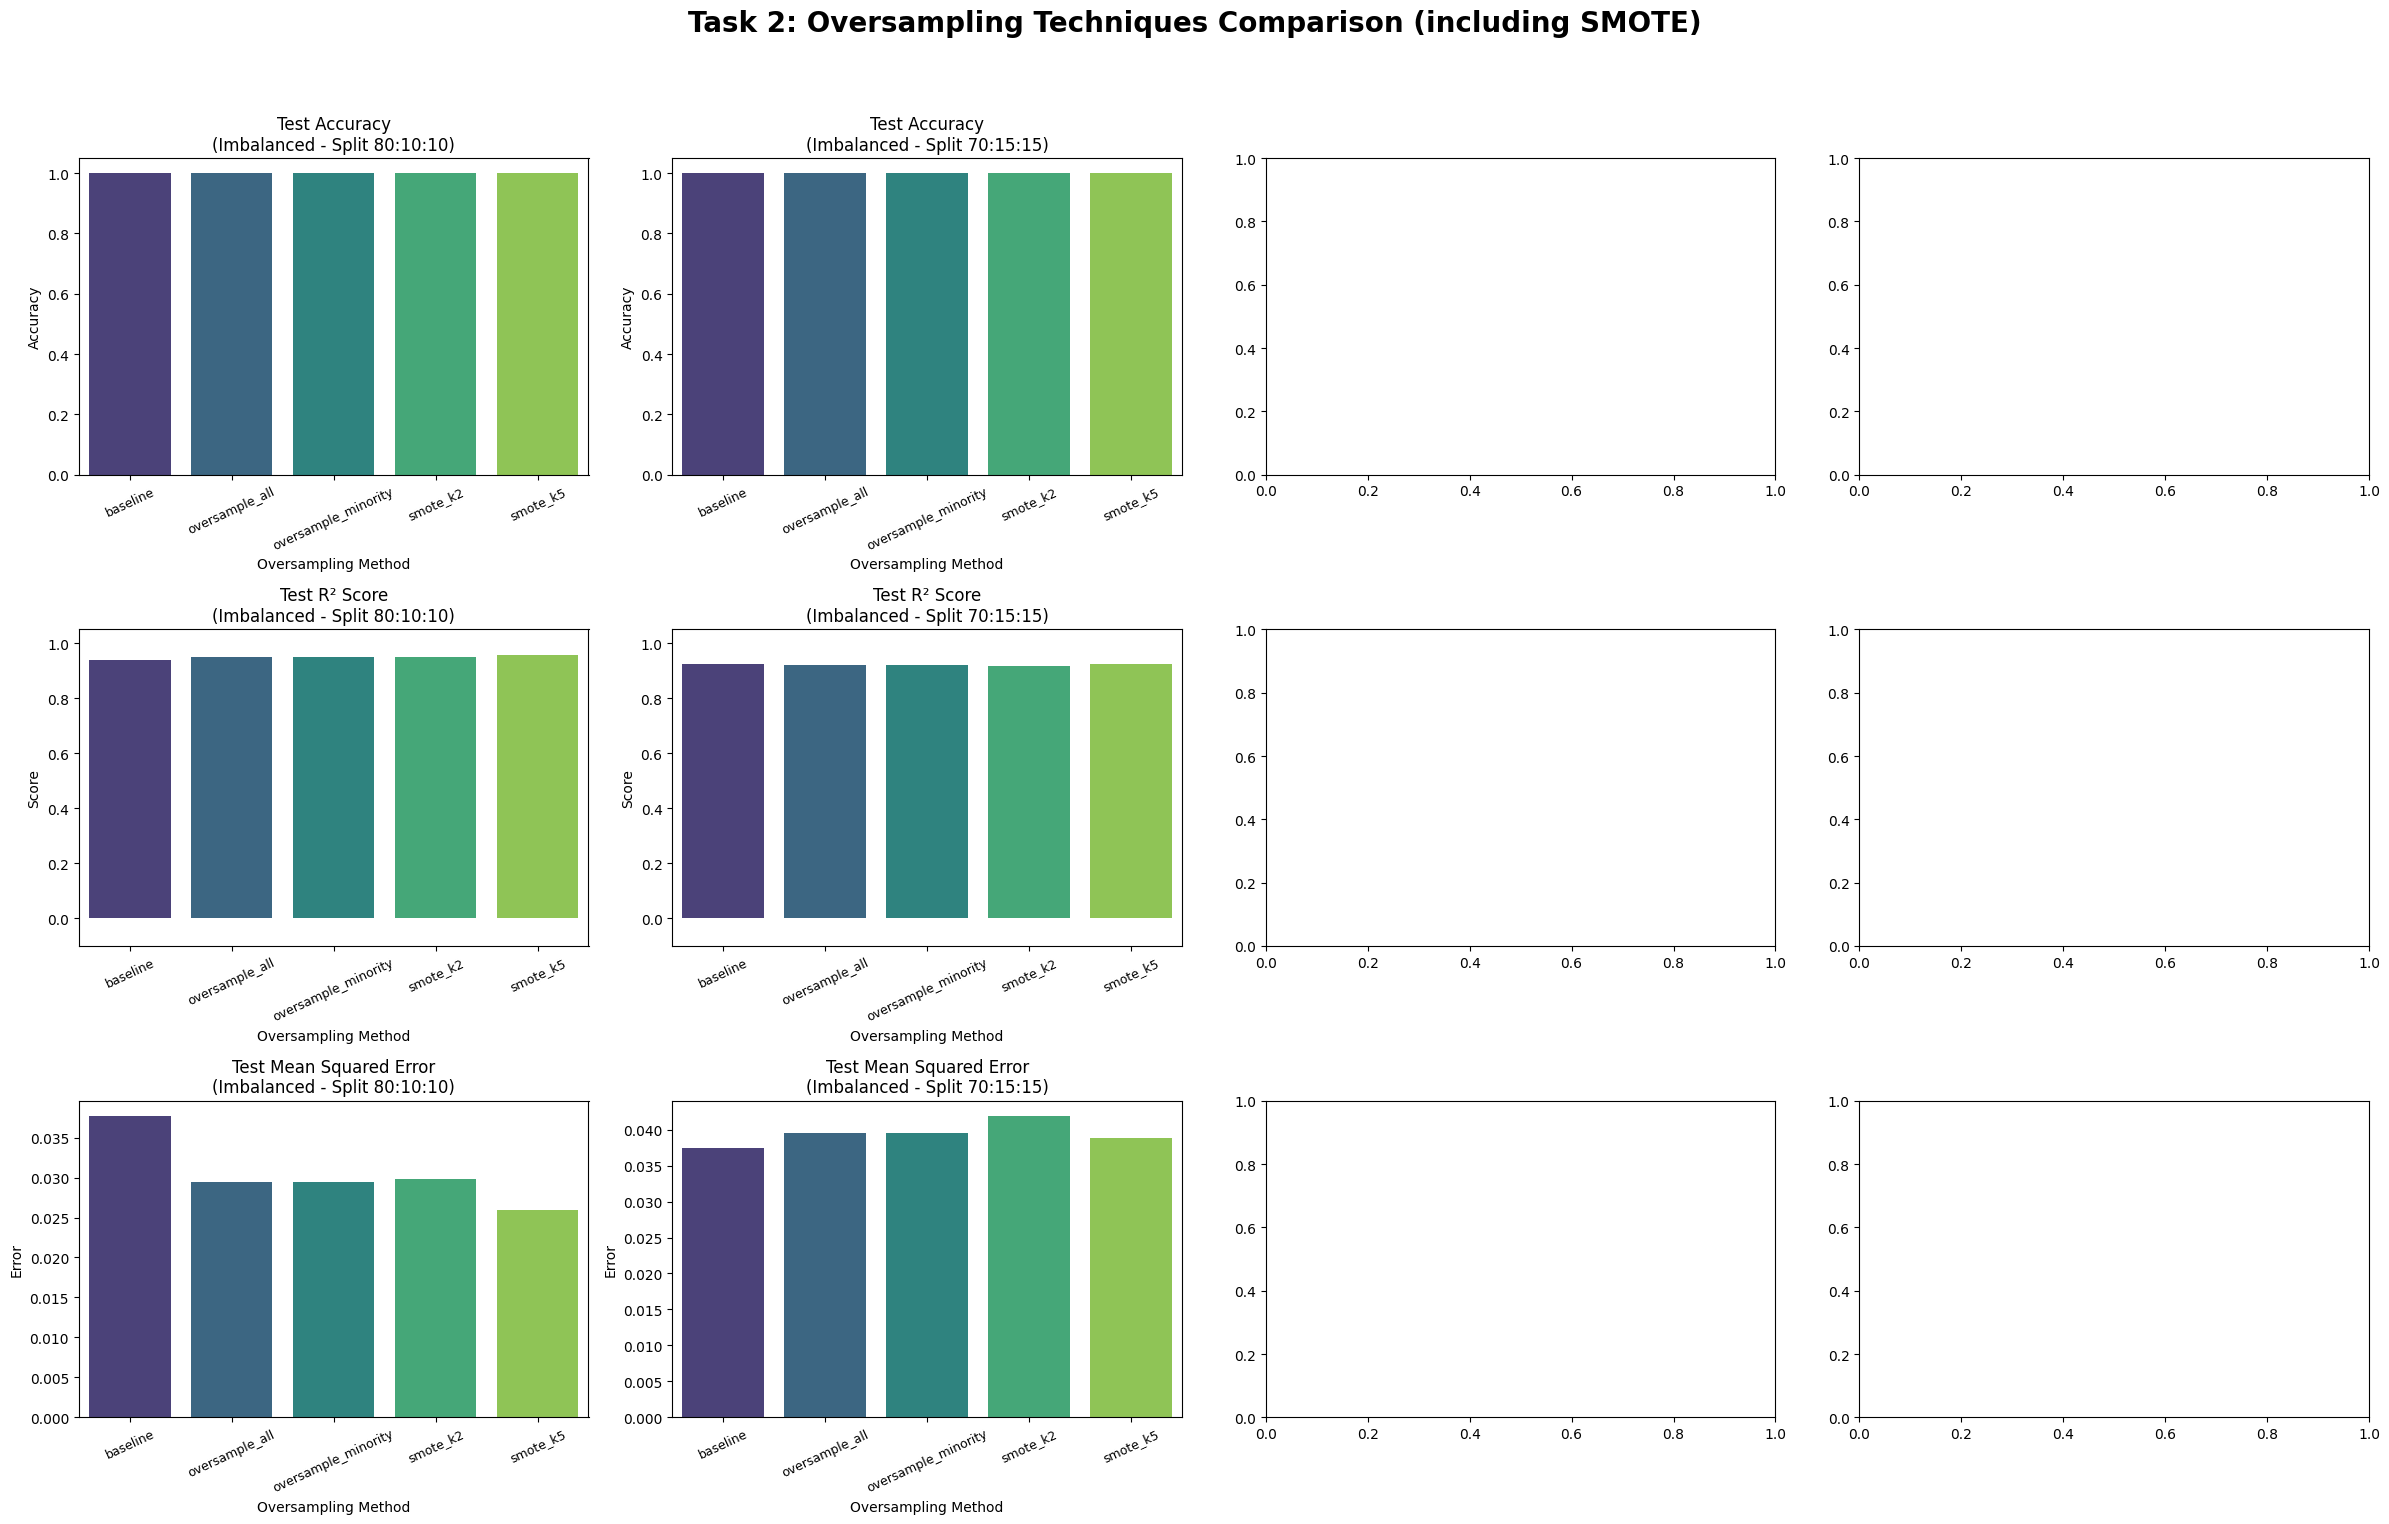


CONFUSION MATRIX VISUALIZATION (Imbalanced Dataset, 80:10:10 Split)


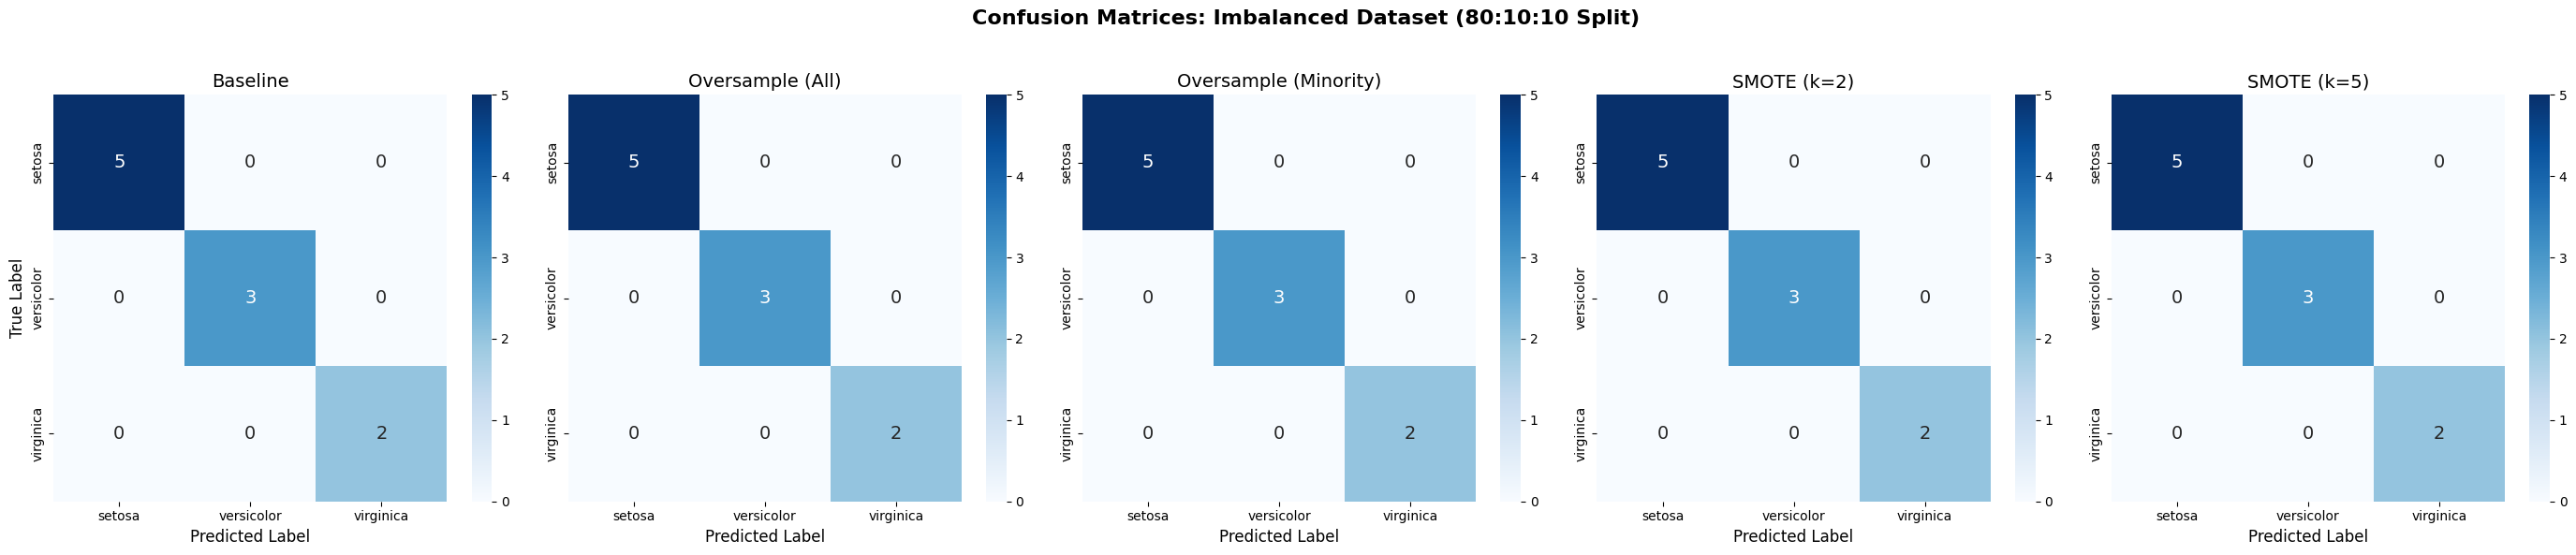

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

print("="*80)
print("TASK 2: LINEAR REGRESSION WITH OVERSAMPLING TECHNIQUES (INCLUDING SMOTE)")
print("="*80)

# Load the Iris dataset
print("Loading Iris Dataset...")
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['species'])

print(f"Original dataset shape: {X.shape}")
print(f"Original target distribution:")
original_distribution = Counter(y['species'])
for class_label, count in sorted(original_distribution.items()):
    print(f"  Class {class_label} ({iris.target_names[class_label]}): {count} samples")

# Function to create imbalanced dataset for demonstration
def create_imbalanced_dataset(X, y, imbalance_ratios=[1.0, 0.6, 0.3]):
    """
    Create an imbalanced version of the dataset
    """
    X_imbalanced = []
    y_imbalanced = []

    for class_idx, ratio in enumerate(imbalance_ratios):
        class_mask = y['species'] == class_idx
        class_X = X[class_mask]
        class_y = y[class_mask]

        n_samples = int(len(class_X) * ratio)
        indices = np.random.choice(len(class_X), n_samples, replace=False)

        X_imbalanced.append(class_X.iloc[indices])
        y_imbalanced.append(class_y.iloc[indices])

    X_imbalanced = pd.concat(X_imbalanced, ignore_index=True)
    y_imbalanced = pd.concat(y_imbalanced, ignore_index=True)

    return X_imbalanced, y_imbalanced

# Create imbalanced dataset for demonstration
print("\nCreating imbalanced dataset for demonstration...")
X_imbalanced, y_imbalanced = create_imbalanced_dataset(X, y)

print(f"Imbalanced dataset shape: {X_imbalanced.shape}")
print(f"Imbalanced target distribution:")
imbalanced_distribution = Counter(y_imbalanced['species'])
for class_label, count in sorted(imbalanced_distribution.items()):
    print(f"  Class {class_label} ({iris.target_names[class_label]}): {count} samples")

# Function to create train-validation-test splits
def create_splits(X, y, train_ratio, val_ratio, test_ratio, random_state=42):
    """Create train-validation-test splits with specified ratios"""
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_ratio, random_state=random_state, stratify=y
    )

    val_ratio_adjusted = val_ratio / (train_ratio + val_ratio)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_ratio_adjusted, random_state=random_state, stratify=y_temp
    )

    return X_train, X_val, X_test, y_train, y_val, y_test

# Function to apply oversampling
def apply_oversampling(X_train, y_train, strategy='auto'):
    """Apply random oversampling to balance the dataset"""
    ros = RandomOverSampler(sampling_strategy=strategy, random_state=42)
    X_resampled, y_resampled = ros.fit_resample(X_train, y_train.values.ravel())
    return pd.DataFrame(X_resampled, columns=X_train.columns), pd.DataFrame(y_resampled, columns=['species'])

# Function to apply SMOTE
def apply_smote(X_train, y_train, k_neighbors, strategy='auto'):
    """Apply SMOTE to balance the dataset"""
    # Ensure k_neighbors is less than the number of samples in the smallest class
    min_class_count = Counter(y_train['species']).most_common()[-1][1]
    if k_neighbors >= min_class_count:
        print(f"  Warning: k_neighbors={k_neighbors} is >= smallest class size ({min_class_count}). Adjusting k_neighbors to {min_class_count - 1}.")
        k_neighbors = min_class_count - 1

    if k_neighbors < 1:
        print(f"  Skipping SMOTE as smallest class size is too small.")
        return X_train.copy(), y_train.copy()

    smote = SMOTE(sampling_strategy=strategy, k_neighbors=k_neighbors, random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train.values.ravel())
    return pd.DataFrame(X_resampled, columns=X_train.columns), pd.DataFrame(y_resampled, columns=['species'])

# Function to train and evaluate model
def train_evaluate_model(X_train, X_val, X_test, y_train, y_val, y_test, model_name):
    """Train and evaluate linear regression model"""
    print(f"\n" + "="*60)
    print(f"MODEL: {model_name}")
    print("="*60)

    # Display training set distribution
    train_dist = Counter(y_train['species'])
    print(f"Training set distribution:")
    for class_label, count in sorted(train_dist.items()):
        print(f"  Class {class_label} ({iris.target_names[class_label]}): {count} samples")

    # Flatten y arrays
    y_train_flat = y_train.values.ravel()
    y_val_flat = y_val.values.ravel()
    y_test_flat = y_test.values.ravel()

    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train_flat)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Regression metrics
    train_mse = mean_squared_error(y_train_flat, y_train_pred)
    val_mse = mean_squared_error(y_val_flat, y_val_pred)
    test_mse = mean_squared_error(y_test_flat, y_test_pred)

    train_r2 = r2_score(y_train_flat, y_train_pred)
    val_r2 = r2_score(y_val_flat, y_val_pred)
    test_r2 = r2_score(y_test_flat, y_test_pred)

    print(f"\nRegression Metrics:")
    print(f"Training   - MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
    print(f"Validation - MSE: {val_mse:.4f}, R²: {val_r2:.4f}")
    print(f"Test       - MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

    # Classification metrics (rounded predictions)
    y_train_pred_class = np.clip(np.round(y_train_pred).astype(int), 0, 2)
    y_val_pred_class = np.clip(np.round(y_val_pred).astype(int), 0, 2)
    y_test_pred_class = np.clip(np.round(y_test_pred).astype(int), 0, 2)

    train_acc = accuracy_score(y_train_flat, y_train_pred_class)
    val_acc = accuracy_score(y_val_flat, y_val_pred_class)
    test_acc = accuracy_score(y_test_flat, y_test_pred_class)

    print(f"\nClassification Metrics (rounded predictions):")
    print(f"Training   - Accuracy: {train_acc:.4f}")
    print(f"Validation - Accuracy: {val_acc:.4f}")
    print(f"Test       - Accuracy: {test_acc:.4f}")

    # Classification report for test set
    print(f"\nClassification Report (Test Set):")
    print(classification_report(y_test_flat, y_test_pred_class,
                              target_names=iris.target_names, zero_division=0))

    return model, {
        'train_mse': train_mse, 'val_mse': val_mse, 'test_mse': test_mse,
        'train_r2': train_r2, 'val_r2': val_r2, 'test_r2': test_r2,
        'train_acc': train_acc, 'val_acc': val_acc, 'test_acc': test_acc,
        'y_test_pred': y_test_pred, 'y_test_actual': y_test_flat,
        'train_dist': train_dist
    }

# Experiment with different datasets and splits
results = {}
datasets = {
    'Original_Balanced': (X, y),
    'Imbalanced': (X_imbalanced, y_imbalanced)
}

splits = {
    '80:10:10': (0.8, 0.1, 0.1),
    '70:15:15': (0.7, 0.15, 0.15)
}

print("\n" + "="*80)
print("EXPERIMENTS WITH DIFFERENT CONFIGURATIONS")
print("="*80)

for dataset_name, (X_data, y_data) in datasets.items():
    print(f"\nDataset: {dataset_name}")
    print("-" * 40)

    for split_name, (train_ratio, val_ratio, test_ratio) in splits.items():
        print(f"\nSplit: {split_name}")

        # Create splits
        X_train, X_val, X_test, y_train, y_val, y_test = create_splits(
            X_data, y_data, train_ratio, val_ratio, test_ratio
        )

        # 1. Baseline model (no oversampling)
        model_baseline, metrics_baseline = train_evaluate_model(
            X_train, X_val, X_test, y_train, y_val, y_test,
            f"{dataset_name}_{split_name}_Baseline"
        )

        # 2. Random oversampling - balance all classes
        X_train_over_all, y_train_over_all = apply_oversampling(X_train, y_train, strategy='auto')
        model_over_all, metrics_over_all = train_evaluate_model(
            X_train_over_all, X_val, X_test, y_train_over_all, y_val, y_test,
            f"{dataset_name}_{split_name}_Oversample_All"
        )

        # 3. Random oversampling - balance only minority classes
        X_train_over_min, y_train_over_min = apply_oversampling(X_train, y_train, strategy='not majority')
        model_over_min, metrics_over_min = train_evaluate_model(
            X_train_over_min, X_val, X_test, y_train_over_min, y_val, y_test,
            f"{dataset_name}_{split_name}_Oversample_Minority"
        )

        # 4. SMOTE with k_neighbors=2
        X_train_smote_k2, y_train_smote_k2 = apply_smote(X_train, y_train, k_neighbors=2)
        model_smote_k2, metrics_smote_k2 = train_evaluate_model(
            X_train_smote_k2, X_val, X_test, y_train_smote_k2, y_val, y_test,
            f"{dataset_name}_{split_name}_SMOTE_k2"
        )

        # 5. SMOTE with k_neighbors=5 (default-like)
        X_train_smote_k5, y_train_smote_k5 = apply_smote(X_train, y_train, k_neighbors=5)
        model_smote_k5, metrics_smote_k5 = train_evaluate_model(
            X_train_smote_k5, X_val, X_test, y_train_smote_k5, y_val, y_test,
            f"{dataset_name}_{split_name}_SMOTE_k5"
        )

        # Store results
        key = f"{dataset_name}_{split_name}"
        results[key] = {
            'baseline': metrics_baseline,
            'oversample_all': metrics_over_all,
            'oversample_minority': metrics_over_min,
            'smote_k2': metrics_smote_k2,
            'smote_k5': metrics_smote_k5
        }

# Create comprehensive comparison
print("\n" + "="*80)
print("COMPREHENSIVE PERFORMANCE COMPARISON")
print("="*80)

# Create comparison DataFrame
comparison_data = []
for key, methods in results.items():
    dataset_name, split_name = key.split('_', 1)

    for method_name, metrics in methods.items():
        comparison_data.append({
            'Dataset': dataset_name,
            'Split': split_name,
            'Method': method_name,
            'Test_R2': metrics['test_r2'],
            'Test_Accuracy': metrics['test_acc'],
            'Test_MSE': metrics['test_mse'],
            'Val_R2': metrics['val_r2'],
            'Val_Accuracy': metrics['val_acc']
        })

comparison_df = pd.DataFrame(comparison_data)
print("\nDetailed Results Table:")
print(comparison_df.round(4))

# --- VISUALIZATION ---

# 1. Bar plots for performance comparison
print("\nGenerating performance comparison plots...")
fig, axes = plt.subplots(3, 4, figsize=(24, 16))
fig.suptitle('Task 2: Oversampling Techniques Comparison (including SMOTE)', fontsize=20, fontweight='bold')

metrics_to_plot = ['Test_Accuracy', 'Test_R2', 'Test_MSE']
y_labels = ['Test Accuracy', 'Test R² Score', 'Test Mean Squared Error']
col_idx = 0

for dataset_name in datasets.keys():
    for split_name in splits.keys():
        # Filter data for the current dataset and split
        subset_df = comparison_df[(comparison_df['Dataset'] == dataset_name) & (comparison_df['Split'] == split_name)]

        if subset_df.empty:
            continue

        for row_idx, (metric, y_label) in enumerate(zip(metrics_to_plot, y_labels)):
            ax = axes[row_idx, col_idx]
            sns.barplot(x='Method', y=metric, data=subset_df, ax=ax, palette='viridis', hue='Method', legend=False)
            ax.set_title(f'{y_label}\n({dataset_name} - Split {split_name})', fontsize=12)
            ax.set_xlabel('Oversampling Method', fontsize=10)
            ax.set_ylabel(y_label.split(' ')[-1], fontsize=10)
            ax.tick_params(axis='x', rotation=25, labelsize=9)

            # Set y-axis limits for better comparison across plots
            if 'Accuracy' in metric:
                ax.set_ylim(0, 1.05)
            elif 'R2' in metric:
                min_r2 = min(0, comparison_df[metric].min())
                ax.set_ylim(min_r2 - 0.1, 1.05)
        col_idx += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()


# 2. Confusion Matrices for a specific, insightful case
print("\n" + "="*80)
print("CONFUSION MATRIX VISUALIZATION (Imbalanced Dataset, 80:10:10 Split)")
print("="*80)

key = 'Imbalanced_80:10:10'
if key in results:
    fig_cm, axes_cm = plt.subplots(1, 5, figsize=(28, 6))
    fig_cm.suptitle('Confusion Matrices: Imbalanced Dataset (80:10:10 Split)', fontsize=16, fontweight='bold')

    methods = ['baseline', 'oversample_all', 'oversample_minority', 'smote_k2', 'smote_k5']
    titles = ['Baseline', 'Oversample (All)', 'Oversample (Minority)', 'SMOTE (k=2)', 'SMOTE (k=5)']

    for i, (method, title) in enumerate(zip(methods, titles)):
        y_true = results[key][method]['y_test_actual']
        y_pred = np.clip(np.round(results[key][method]['y_test_pred']).astype(int), 0, 2)

        cm = confusion_matrix(y_true, y_pred)

        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=iris.target_names,
                    yticklabels=iris.target_names,
                    ax=axes_cm[i], annot_kws={"size": 14})

        axes_cm[i].set_title(title, fontsize=14)
        axes_cm[i].set_xlabel('Predicted Label', fontsize=12)
        if i == 0:
            axes_cm[i].set_ylabel('True Label', fontsize=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
else:
    print(f"Results for '{key}' not found, skipping confusion matrix visualization.")

